In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('titanic_toy.csv')

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [8]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [11]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

In [17]:
x_train.shape,y_train.shape

((712, 3), (712,))

In [19]:
x_test.shape, y_test.shape

((179, 3), (179,))

In [20]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [26]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].mean()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [29]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [30]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
770,24.0,9.500,0,24.000000,24.000000,9.500,9.500
334,NaN,133.650,1,29.785904,29.785904,133.650,133.650
761,41.0,7.125,0,41.000000,41.000000,7.125,7.125
360,40.0,27.900,5,40.000000,40.000000,27.900,27.900
173,21.0,7.925,0,21.000000,21.000000,7.925,7.925


In [31]:
x_train.isnull().sum()

Age            148
Fare            36
Family           0
Age_median       0
Age_mean         0
Fare_median      0
Fare_mean        0
dtype: int64

In [32]:
x_train['Age'].var()

204.34951339046142

In [34]:
x_train['Age_mean'].var()

161.81262452718676

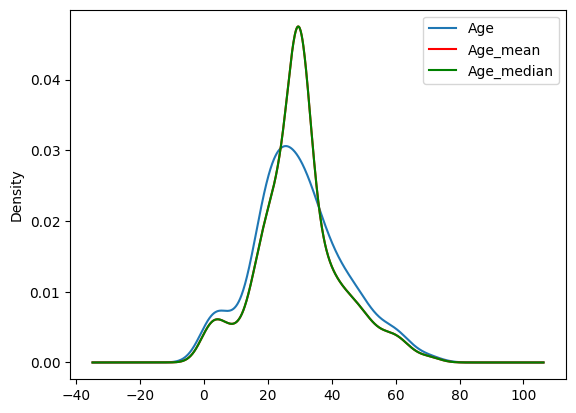

In [58]:
fig = plt.figure()
ax = fig.add_subplot()
x_train['Age'].plot(kind='kde',ax=ax)
x_train['Age_mean'].plot(kind='kde', ax=ax, color='red')
x_train['Age_median'].plot(kind='kde', ax=ax, color='green')
lines, lable=ax.get_legend_handles_labels()
ax.legend(lines, lable, loc='best')

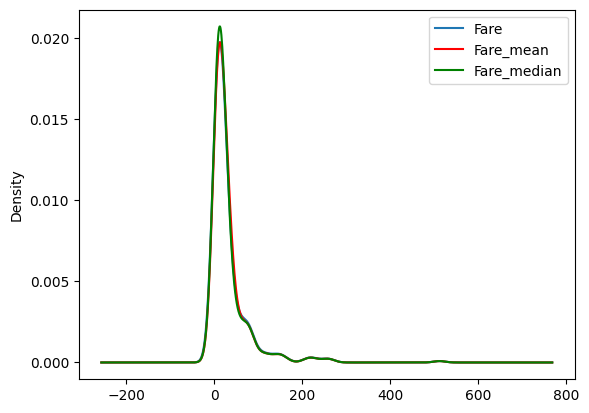

In [59]:
fig = plt.figure()
ax = fig.add_subplot()
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')
x_train['Fare_median'].plot(kind='kde', ax=ax, color='green')
lines, lable=ax.get_legend_handles_labels()
ax.legend(lines, lable, loc='best')

In [60]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,55.603719,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.146106,16.476305,16.385048
Age_median,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,51.358000,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,52.788341,52.788341,2324.238526,2324.238526


<AxesSubplot:>

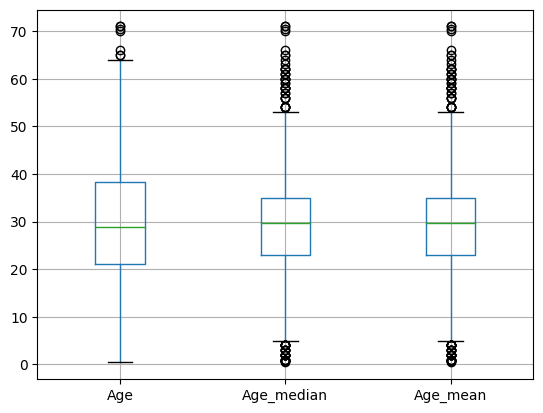

In [62]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<AxesSubplot:>

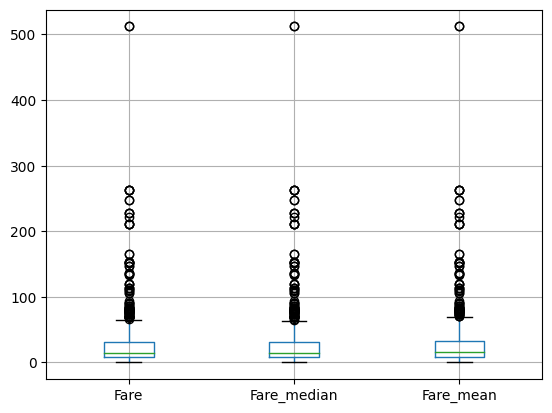

In [63]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

# Using Simple Imputer

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [67]:
imputer_1 = SimpleImputer(strategy = 'median')
imputer_2 = SimpleImputer(strategy = 'mean')

In [71]:
trf = ColumnTransformer([
    ('imputer1',imputer_1,['Age']),
    ('imputer2',imputer_2,['Fare'])
], remainder='passthrough')

In [72]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [74]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [75]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [76]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [77]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])